In [ ]:
# @title Imports and downloads
import os
import sys
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import re


from PIL import Image
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Path to the downloaded dataset
dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/test'


# This is train dataset.

In [ ]:
train_data_directory_path =  '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/radiology/images'

# List all files in the directory
files = os.listdir(train_data_directory_path)

# Create a DataFrame with the file names
df_image_name = pd.DataFrame(files, columns=['Image Name'])

# Replace 'file_path.csv' with the actual path to your CSV file
data_caption_file_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/radiology/traindata.csv'

# Load CSV file into a DataFrame
df_caption = pd.read_csv(data_caption_file_path)

# Extract rows from DataFrame A where 'name' column matches with 'File Name' column in DataFrame B
train_caption_df = pd.merge(df_caption, df_image_name, left_on='name', right_on='Image Name')

# Drop the duplicate 'File Name' column from the result (optional)
train_caption_df.drop(columns=['Image Name'], inplace=True)

# Print the result DataFrame
print(train_caption_df.head())

              id                                           name  \
0     ROCO_00057            PMC3352004_2047-783X-16-7-324-2.jpg   
1     ROCO_00106                PMC3174812_z9k0091109120002.jpg   
2     ROCO_00152               PMC3843904_cro-0006-0561-g01.jpg   
3     ROCO_00168         PMC5644817_amjcaserep-18-1077-g002.jpg   
4     ROCO_00210               PMC2443155_1752-1947-2-217-1.jpg   
...          ...                                            ...   
2495  ROCO_81742             PMC5421543_AMS-AD-1-28496-g001.jpg   
2496  ROCO_81746               PMC3068105_1752-1947-5-107-2.jpg   
2497  ROCO_81748  PMC4327646_1678-7757-jaos-17-04-0301-gf01.jpg   
2498  ROCO_81773                  PMC2876709_LI-26-162-g002.jpg   
2499  ROCO_81788                  PMC3988607_JCIS-4-12-g015.jpg   

                                                caption  
0      MRI showing high signals involving the superi...  
1      An inflated representation of the right hemis...  
2      Axial CT image

In [ ]:
train_caption_df.columns

Index(['id', 'name', 'caption'], dtype='object')

In [ ]:
train_data_nonradiology_directory_path =  '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/non-radiology/images'

# List all files in the directory
files = os.listdir(train_data_nonradiology_directory_path)

# Create a DataFrame with the file names
df_nonradiology_image_name = pd.DataFrame(files, columns=['Image Name'])

# Replace 'file_path.csv' with the actual path to your CSV file
data_caption_file_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/radiology/traindata.csv'

# Load CSV file into a DataFrame
df_caption = pd.read_csv(data_caption_file_path)

# Extract rows from DataFrame A where 'name' column matches with 'File Name' column in DataFrame B
train_caption_nonradiology_df = pd.merge(df_caption, df_nonradiology_image_name, left_on='name', right_on='Image Name')

# Drop the duplicate 'File Name' column from the result (optional)
train_caption_nonradiology_df.drop(columns=['Image Name'], inplace=True)

# Print the result DataFrame
print(train_caption_nonradiology_df)

           id                                     name  \
0  ROCO_08654          PMC3016032_jsls-12-1-30-g02.jpg   
1  ROCO_26170           PMC5516456_OJO-10-114-g002.jpg   
2  ROCO_59950         PMC5317028_eplasty17e05_fig2.jpg   
3  ROCO_64378            PMC3931227_JMP-39-40-g001.jpg   
4  ROCO_71729               PMC4780476_CG-17-62_F3.jpg   
5  ROCO_72657  PMC4332454_12149_2014_849_Fig1_HTML.jpg   

                                             caption  
0   Stomach is being pulled up to the anterior ab...  
1   The largest basal diameter was 4 mm × 2.5 mm,...  
2   Magnetic resonance imaging of myxofibrosarcom...  
3   Bone fixed in the film. Bone axis was kept pe...  
4   Ultrasound showing the cystic formation insid...  
5                  How to place ROI over the liver\n  


In [ ]:
len(train_caption_nonradiology_df)

6

## Display Image

Radiology Samples:


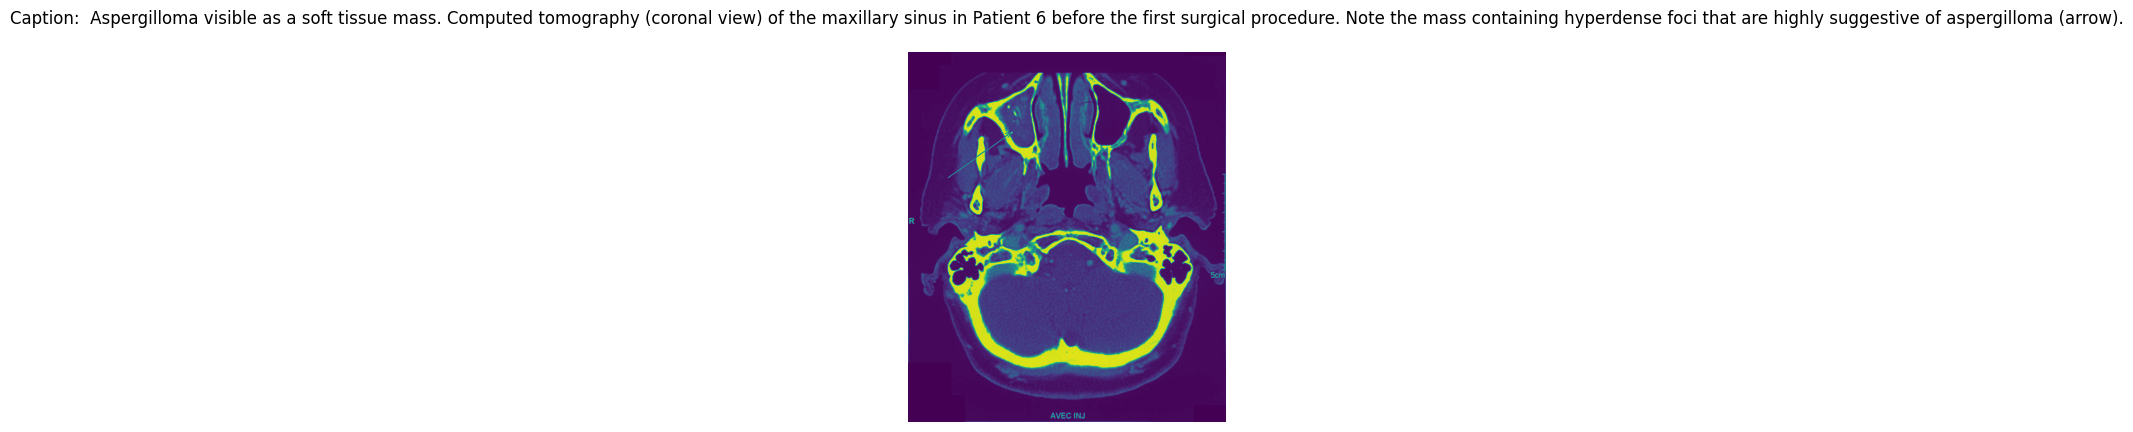

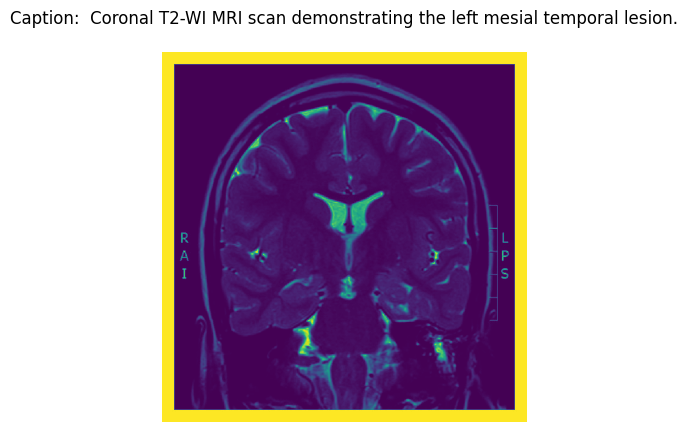

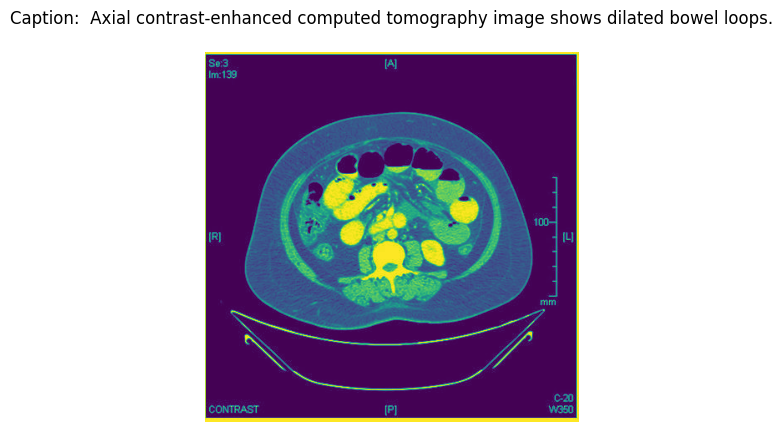

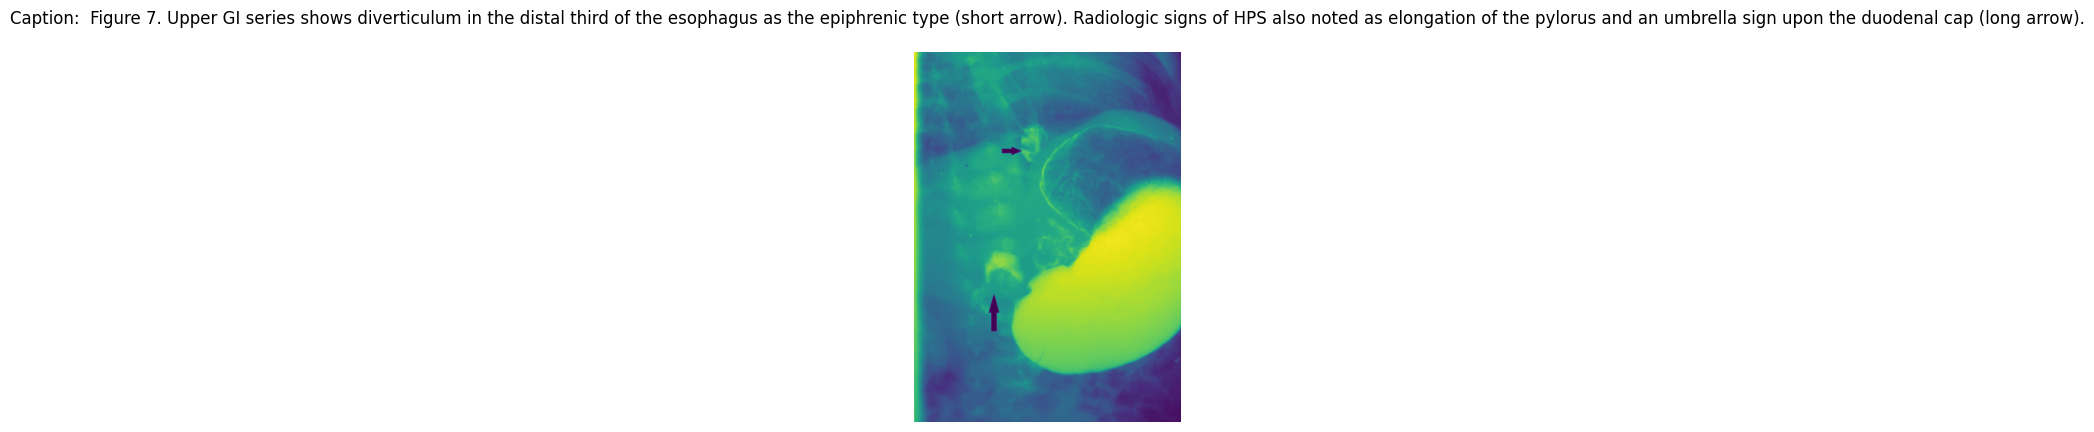

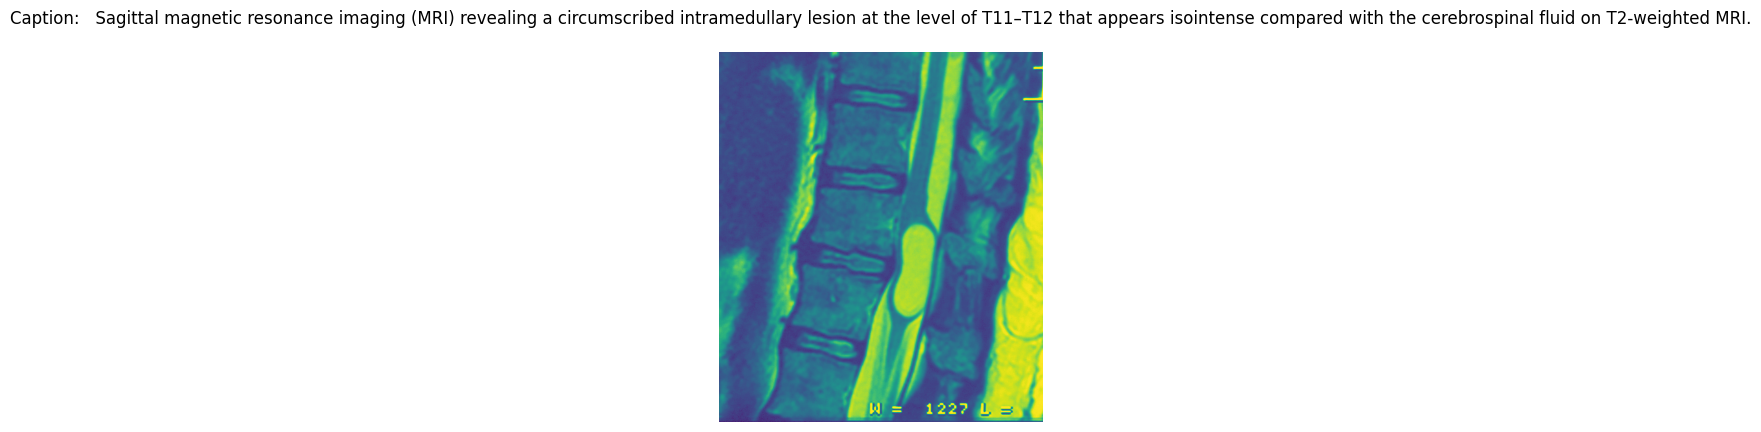

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train'

# Function to load and visualize sample image/caption pairs
def visualize_samples(dataset_path, df, num_samples=5):
    radiology_folder = os.path.join(dataset_path, 'radiology/images')
    non_radiology_folder = os.path.join(dataset_path, 'non-radiology/images')

    # Randomly select samples from radiology and non-radiology classes
    # radiology_samples = random.sample(os.listdir(radiology_folder), num_samples)
    # non_radiology_samples = random.sample(os.listdir(non_radiology_folder), num_samples)
    radiology_images = os.listdir(radiology_folder)
    non_radiology_images = os.listdir(non_radiology_folder)
    # Randomly select samples from radiology and non-radiology classes
    radiology_samples = random.sample(radiology_images, num_samples)
    non_radiology_samples = random.sample(non_radiology_images, num_samples)

    # # Visualize radiology samples with associated captions
    # print("Radiology Samples:")
    # for image_file in radiology_samples:
    #     image_name = image_file[0]  # Remove file extension to match with DataFrame 'name' column
    #     row = df[df['name'] == image_name].iloc[0]  # Get DataFrame row for the corresponding image name
    #     caption = row['caption']

    #     image_path = os.path.join(radiology_folder, image_file)
    #     image = Image.open(image_path)
    #     plt.imshow(image)
    #     plt.axis('off')
    #     plt.title(f"Caption: {caption}")
    #     plt.show()

    # Visualize radiology samples
    print("Radiology Samples:")
    for image_file in radiology_samples:
        image_name = image_file
        row = df[df['name'] == image_name].iloc[0]
        caption = row['caption']
        # print(caption)
        image_path = os.path.join(radiology_folder, image_file)
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Caption: {caption}")
        plt.show()

    # # Visualize non-radiology samples with associated captions
    # print("Non-Radiology Samples:")
    # for image_file in non_radiology_samples:
    #     image_name = image_file[0]  # Remove file extension to match with DataFrame 'name' column
    #     row = df[df['name'] == image_name].iloc[0]  # Get DataFrame row for the corresponding image name
    #     caption = row['caption']

    #     image_path = os.path.join(non_radiology_folder, image_file)
    #     image = Image.open(image_path)
    #     plt.imshow(image)
    #     plt.axis('off')
    #     plt.title(f"Caption: {caption}")
    #     plt.show()
    # Visualize non-radiology samples
    # print("Non-Radiology Samples:")
    # for image_file in non_radiology_samples:
    #     image_name = image_file
    #     row = df[df['name'] == image_name].iloc[0]
    #     caption = row['caption']
    #     image_path = os.path.join(non_radiology_folder, image_file)
    #     image = Image.open(image_path)
    #     plt.imshow(image)
    #     plt.axis('off')
    #     plt.title(f"Caption: {caption}")
    #     plt.show()

# Usage example
# Assuming df is your DataFrame and dataset_path is the path to the dataset folder
# visualize_samples('/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/test', df)

# Visualize 5 samples from each class
visualize_samples(dataset_path, train_caption_df)


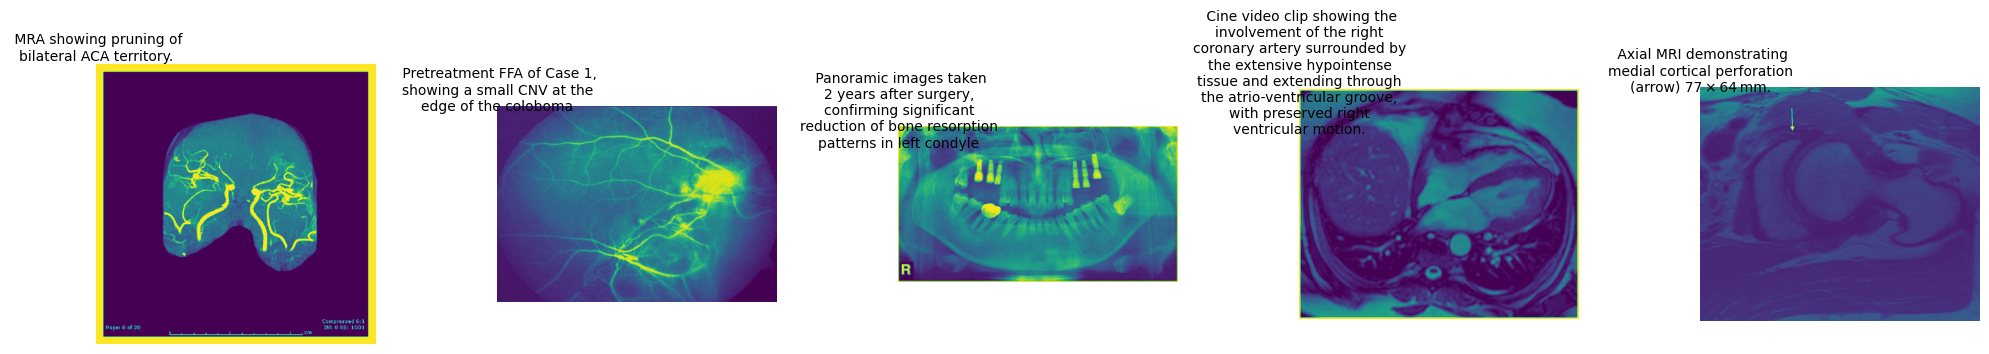

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from textwrap import fill

# Path to the directory containing images
dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/test'

# Function to load and visualize sample image/caption pairs
def visualize_samples(dataset_path, df, num_samples=5):
    radiology_folder = os.path.join(dataset_path, 'radiology/images_all')

    # Randomly select samples from radiology class
    radiology_images = os.listdir(radiology_folder)
    radiology_samples = random.sample(radiology_images, num_samples)

    # Set up subplots
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))

    # Visualize radiology samples
    for i, image_file in enumerate(radiology_samples):
        image_name = image_file
        row = df[df['name'] == image_name].iloc[0]
        caption = row['caption']

        # Load the image
        image_path = os.path.join(radiology_folder, image_file)
        image = Image.open(image_path)

        # Set axis off and display the image
        axes[i].imshow(image)
        axes[i].axis('off')

        # Wrap the caption text to fit within the image size with padding
        wrapped_caption = fill(caption, width=30)  # Adjust width as needed
        wrapped_caption += '\n\n'  # Adding padding after the text
        axes[i].text(0.5, 0.5, wrapped_caption, horizontalalignment='center', verticalalignment='center', wrap=True)

    plt.tight_layout()
    plt.show()

# Assuming test_caption_df is your DataFrame containing image names and captions
# Visualize 5 samples from the radiology class
visualize_samples(dataset_path, train_caption_df)


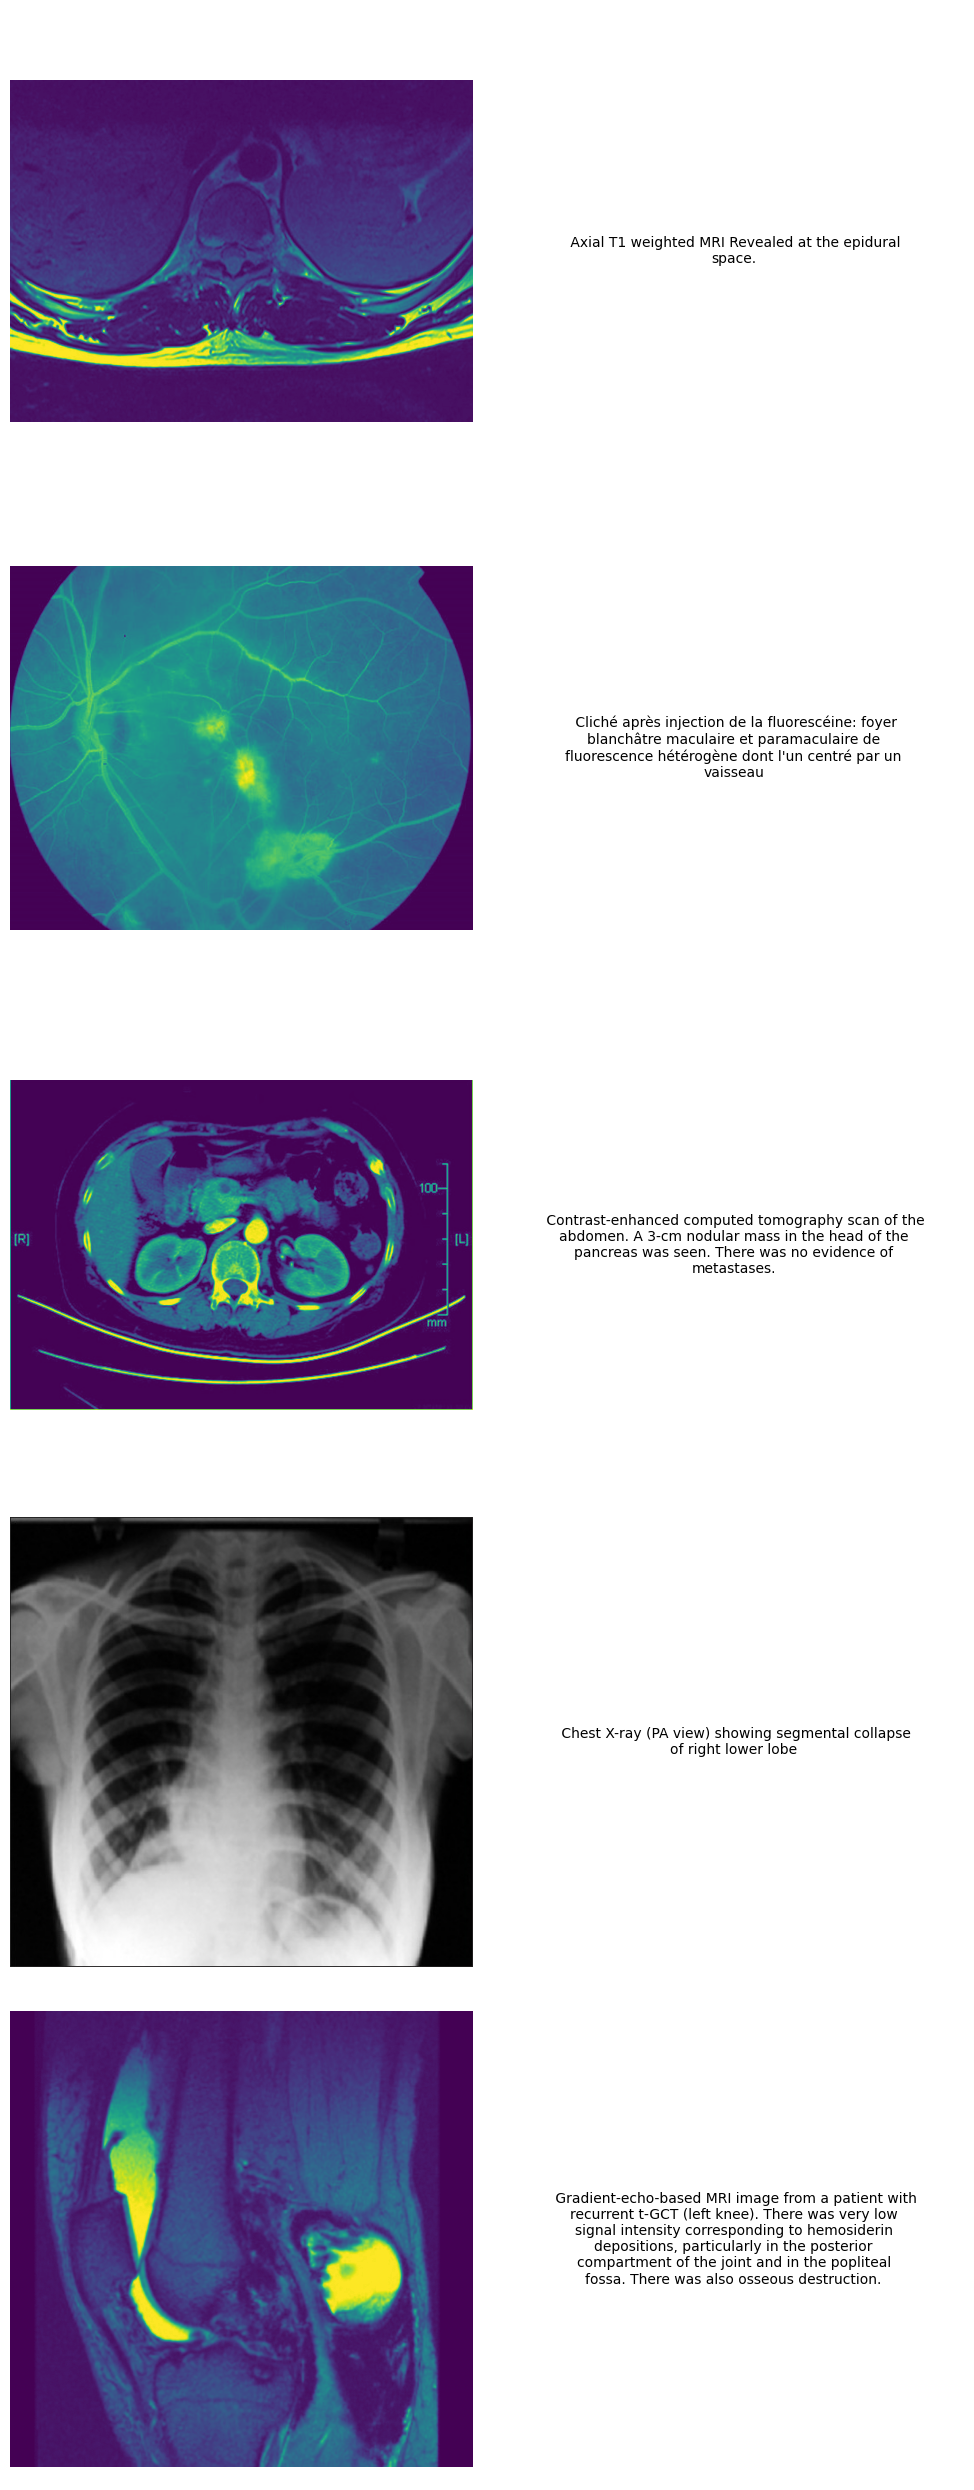

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from textwrap import fill

# Path to the directory containing images
dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train'

# Function to load and visualize sample image/caption pairs
def visualize_samples(dataset_path, df, num_samples=5):
    radiology_folder = os.path.join(dataset_path, 'radiology/images')

    # Randomly select samples from radiology class
    radiology_images = os.listdir(radiology_folder)
    radiology_samples = random.sample(radiology_images, num_samples)

    # Set up subplots
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 5*num_samples))

    # Visualize radiology samples
    for i, image_file in enumerate(radiology_samples):
        image_name = image_file
        row = df[df['name'] == image_name].iloc[0]
        caption = row['caption']

        # Load the image
        image_path = os.path.join(radiology_folder, image_file)
        image = Image.open(image_path)

        # Display the image
        axes[i, 0].imshow(image)
        axes[i, 0].axis('off')

        # Wrap the caption text to fit within the subplot width
        wrapped_caption = fill(caption, width=50)  # Adjust width as needed
        axes[i, 1].text(0.5, 0.5, wrapped_caption, horizontalalignment='center', verticalalignment='center')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming test_caption_df is your DataFrame containing image names and captions
# Visualize 5 samples from the radiology class
visualize_samples(dataset_path, train_caption_df)


### Non-radiology images

In [ ]:
# import os
# import random
# from PIL import Image
# import matplotlib.pyplot as plt
# from textwrap import fill

# # Path to the directory containing images
# dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train'

# # Function to load and visualize sample image/caption pairs
# def visualize_samples(dataset_path, df, num_samples=5):
#     radiology_folder = os.path.join(dataset_path, 'non-radiology/images')

#     # Randomly select samples from radiology class
#     radiology_images = os.listdir(radiology_folder)
#     radiology_samples = random.sample(radiology_images, num_samples)

#     # Set up subplots
#     fig, axes = plt.subplots(num_samples, 2, figsize=(10, 5*num_samples))

#     # Visualize radiology samples
#     for i, image_file in enumerate(radiology_samples):
#         image_name = image_file
#         row = df[df['name'] == image_name].iloc[0]
#         caption = row['caption']

#         # Load the image
#         image_path = os.path.join(radiology_folder, image_file)
#         image = Image.open(image_path)

#         # Display the image
#         axes[i, 0].imshow(image)
#         axes[i, 0].axis('off')

#         # Wrap the caption text to fit within the subplot width
#         wrapped_caption = fill(caption, width=50)  # Adjust width as needed
#         axes[i, 1].text(0.5, 0.5, wrapped_caption, horizontalalignment='center', verticalalignment='center')
#         axes[i, 1].axis('off')

#     plt.tight_layout()
#     plt.show()

# # Assuming test_caption_df is your DataFrame containing image names and captions
# # Visualize 5 samples from the radiology class
# visualize_samples(dataset_path, train_caption_df)


In [ ]:
# For demonstration purposes, let's assume the delimiter is a tab character ('\t')
delimiter = '\t'

# Path where you want to save the .txt file
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/train_caption_df.txt'

# Save the DataFrame as a .txt file with a custom delimiter
train_caption_df.to_csv(file_path, sep=delimiter, index=False)

print(f'DataFrame saved as .txt file at: {file_path}')


DataFrame saved as .txt file at: /content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/train_caption_df.txt


# Image Caption Generator using Deep Learning

In [ ]:
token_path = #'/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/train_caption_df.txt'
text = open(token_path, 'r', encoding = 'utf-8').read()

In [ ]:
# def load_description(text):
#     mapping = dict()
#     for line in text.split("\n"):
#         token = line.split("\t")
#         if len(token) < 3:   # remove short descriptions
#             continue
#         img_id = token[0]
#         img_name = token[1]
#         img_des = token[2]  # description of the image
#         if img_id not in mapping:
#             mapping[img_id] = list()
#         mapping[img_id].append(img_des)
#     return mapping

# token_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/train_caption_df.txt'
# text = open(token_path, 'r', encoding = 'utf-8').read()
# descriptions = load_description(text)
# print(descriptions['ROCO_00210'])

In [ ]:
import csv

def load_description_from_csv(file_path):
    mapping = dict()
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header row if present
        for row in reader:
            if len(row) < 3:  # skip rows with insufficient columns
                continue
            img_id = row[0]
            img_name = row[1]
            img_caption = row[2]  # caption of the image
            if img_id not in mapping:
                mapping[img_id] = list()
            mapping[img_id].append(img_caption)
    return mapping

csv_file_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/radiologytraindata.csv'  # Provide the correct path to your CSV file
descriptions = load_description_from_csv(csv_file_path)
print(descriptions['ROCO_00210'])


[' A computed tomography scan of the chest shows the main pulmonary artery was obstructed circumferentially.\n']


In [ ]:
print(descriptions['ROCO_05168'])

[" PA chest radiograph from the patient's readmission to the hospital. There is a large right pleural effusion, with an air- and fluid-filled structure noted laterally.\n"]


In [ ]:
print(len(descriptions))

65450


### Cleaning the text

In [ ]:
# def clean_description(desc):
#     for key, des_list in desc.items():
#         for i in range(len(des_list)):
#             caption = des_list[i]
#             caption = [ch for ch in caption if ch not in string.punctuation]
#             caption = ''.join(caption)
#             caption = caption.split(' ')
#             caption = [word.lower() for word in caption if len(word)>1 and word.isalpha()]
#             caption = ' '.join(caption)
#             des_list[i] = caption

# clean_description(descriptions)
# descriptions['ROCO_05168']

['pa chest radiograph from the patients readmission to the hospital there is large right pleural effusion with an air and fluidfilled structure noted laterally']

In [ ]:
# import string
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize

# nltk.download('punkt')
# nltk.download('stopwords')

# def clean_description(desc):
#     stop_words = set(stopwords.words('english'))
#     porter = PorterStemmer()

#     for key, des_list in desc.items():
#         for i in range(len(des_list)):
#             caption = des_list[i]

#             # Remove punctuation
#             caption = ''.join([ch for ch in caption if ch not in string.punctuation])

#             # Tokenization
#             words = word_tokenize(caption)

#             # Lowercasing, stop words removal, and stemming
#             words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
#             words = [porter.stem(word) for word in words]

#             # Join the words back into a sentence
#             cleaned_caption = ' '.join(words)
#             des_list[i] = cleaned_caption

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_description(desc):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    for key, des_list in desc.items():
        for i in range(len(des_list)):
            caption = des_list[i]

            # Remove punctuation
            caption = ''.join([ch for ch in caption if ch not in string.punctuation])

            # Tokenization
            words = word_tokenize(caption)

            # Lowercasing, stop words removal, and lemmatization
            words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word not in stop_words]

            # Join the words back into a sentence
            cleaned_caption = ' '.join(words)
            des_list[i] = cleaned_caption



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
clean_description(descriptions)
descriptions['ROCO_05168']

['pa chest radiograph patient readmission hospital there large right pleural effusion air fluidfilled structure noted laterally']

In [ ]:
type(descriptions)

dict

In [ ]:
len(descriptions)

65450

In [ ]:
# for key,value in descriptions.items():
#   print (value)

### Generate the Vocabulary

In [ ]:
def to_vocab(desc):
  #count = 0
  words = []
  for value in desc.values():
    value_list = value[0].split()
    for v in value_list:
      words.append(v)
      #print(words)
    #count += 1
    #if count>5:
    #  break
  return words

In [ ]:
list_words = to_vocab(descriptions)

In [ ]:
len(list_words)

932675

In [ ]:
type(list_words)

list

In [ ]:
from collections import Counter

# Sample vocabulary (replace this with your actual vocabulary)
vocabulary = list_words

# Count word occurrences using Counter from collections
word_counts = Counter(vocabulary)
#print(word_counts)
# Sort the words based on frequency in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

# # Print the sorted word frequencies
# for word, frequency in sorted_word_counts.items():
#     print(f"{word}: {frequency}")


In [ ]:
len(sorted_word_counts)

34410

In [ ]:
import csv

# Specify the CSV file path
csv_file_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/vocab_output.csv'

# Write dictionary to CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    # Write header (if needed)
    csv_writer.writerow(['word', 'count'])  # Uncomment this line if you want to include a header

    # Write dictionary items to CSV
    for key, value in sorted_word_counts.items():
        csv_writer.writerow([key, value])


In [ ]:
first_10_items = dict(list(sorted_word_counts.items())[:10])
for word, frequency in first_10_items.items():
    print(f"{word}: {frequency}")

showing: 17681
arrow: 16514
left: 14047
right: 13710
ct: 11009
image: 10913
the: 8412
show: 8099
scan: 8075
mass: 6630


In [ ]:
first_10_items = dict(list(sorted_word_counts.items())[-10:])
for word, frequency in first_10_items.items():
    print(f"{word}: {frequency}")

retard: 1
remplissage: 1
choroïdien: 1
hyperfluorescents: 1
blindness: 1
wish: 1
spinoiliac: 1
inframesocolic: 1
extremitiescoronal: 1
concomitantly: 1


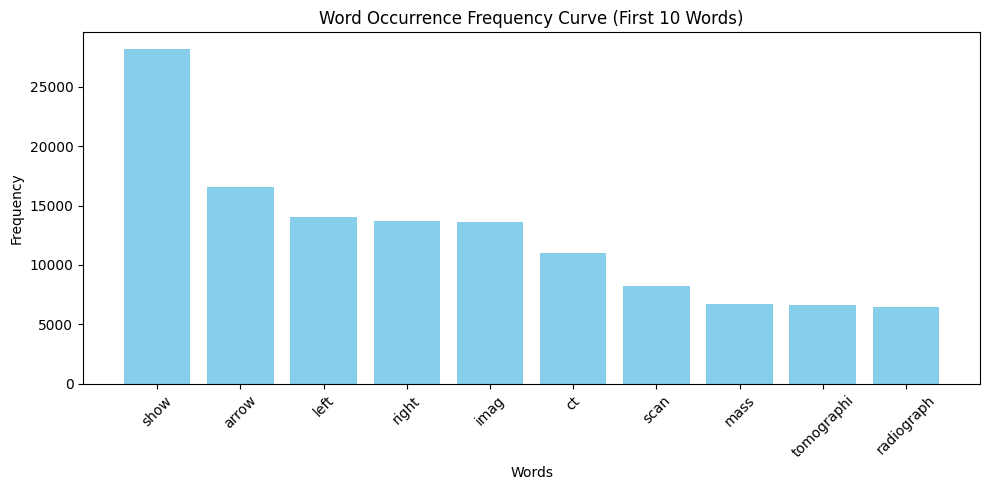

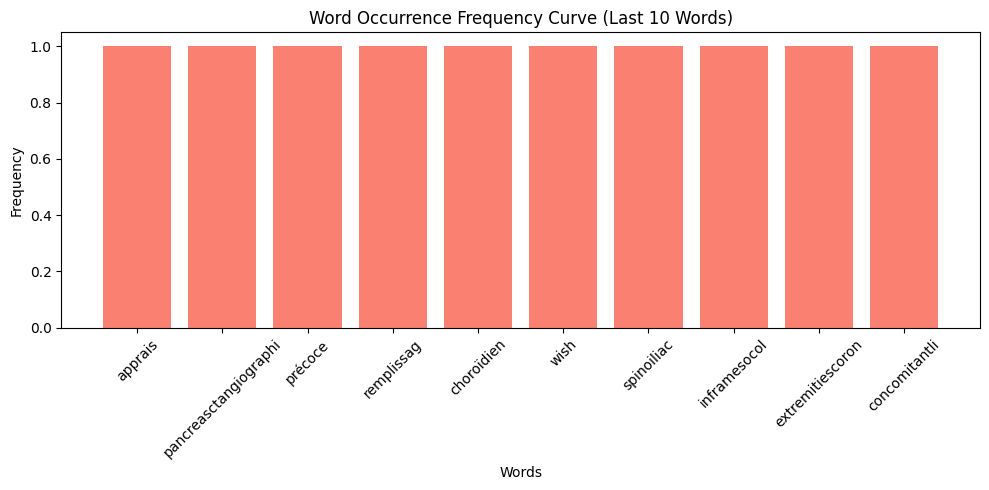

In [ ]:
import matplotlib.pyplot as plt

# Extract the first 10 and last 10 words and their frequencies
first_10_words = list(sorted_word_counts.keys())[:10]
first_10_frequencies = list(sorted_word_counts.values())[:10]

last_10_words = list(sorted_word_counts.keys())[-10:]
last_10_frequencies = list(sorted_word_counts.values())[-10:]

# Plotting the first 10 words
plt.figure(figsize=(10, 5))
plt.bar(first_10_words, first_10_frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Occurrence Frequency Curve (First 10 Words)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the last 10 words
plt.figure(figsize=(10, 5))
plt.bar(last_10_words, last_10_frequencies, color='salmon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Occurrence Frequency Curve (Last 10 Words)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


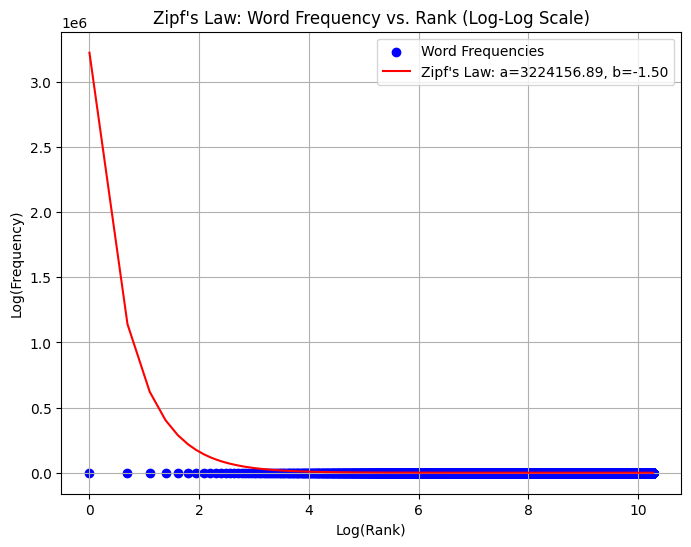

In [ ]:
# Extract word frequencies and ranks
frequencies = list(sorted_word_counts.values())
ranks = np.arange(1, len(frequencies) + 1)

# Calculate log(frequencies) and log(ranks)
log_frequencies = np.log(frequencies)
log_ranks = np.log(ranks)

# Perform linear regression
coefficients = np.polyfit(log_ranks, log_frequencies, 1)
a, b = np.exp(coefficients[1]), coefficients[0]

# Plotting the log-log curve
plt.figure(figsize=(8, 6))
plt.scatter(log_ranks, log_frequencies, color='blue', label='Word Frequencies')
plt.plot(log_ranks, a * np.exp(b * log_ranks), color='red', label=f'Zipf\'s Law: a={a:.2f}, b={b:.2f}')
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.title('Zipf\'s Law: Word Frequency vs. Rank (Log-Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-175-5519443917b8>:31: RuntimeWarning: overflow encountered in power
  return a * np.power(x, -b)
<ipython-input-175-5519443917b8>:31: RuntimeWarning: overflow encountered in multiply
  return a * np.power(x, -b)


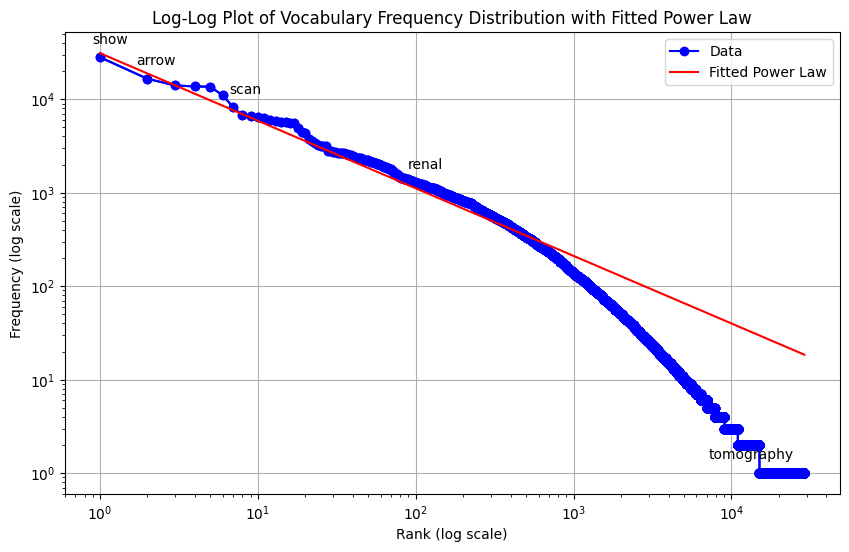

In [ ]:
from scipy.optimize import curve_fit

frequencies = list(sorted_word_counts.values())
frequencies.sort(reverse=True)  # Sort frequencies in descending order

# Calculate ranks and frequencies for log-log plot
ranks = np.arange(1, len(frequencies) + 1)
log_ranks = np.log10(ranks)
log_frequencies = np.log10(frequencies)

plt.figure(figsize=(10, 6))

plt.loglog(ranks, frequencies, marker='o', linestyle='-', color='b')

plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Log-Log Plot of Vocabulary Frequency Distribution with Fitted Power Law')
plt.grid(True)

# Fit a power-law curve here if you have the fitting function

# Annotate random words on the curve
words_to_annotate = ['show', 'arrow','scan', 'tomography','renal']
for word in words_to_annotate:
    frequency = sorted_word_counts[word]
    rank = ranks[list(sorted_word_counts.keys()).index(word)]
    plt.annotate(word, xy=(rank, frequency), xytext=(20, 10),
                 textcoords='offset points', ha='right')

def power_law(x, a, b):
    return a * np.power(x, -b)

params, covariance = curve_fit(power_law, ranks, frequencies)

plt.loglog(ranks, frequencies, marker='o', linestyle='-', color='b', label='Data')
plt.loglog(ranks, power_law(ranks, *params), color='r', label='Fitted Power Law')

plt.legend()
plt.show()


# plt.grid(True)

# plt.show()


<ipython-input-171-1329311a2fae>:4: RuntimeWarning: overflow encountered in power
  return a * np.power(x, -b)
<ipython-input-171-1329311a2fae>:4: RuntimeWarning: overflow encountered in multiply
  return a * np.power(x, -b)


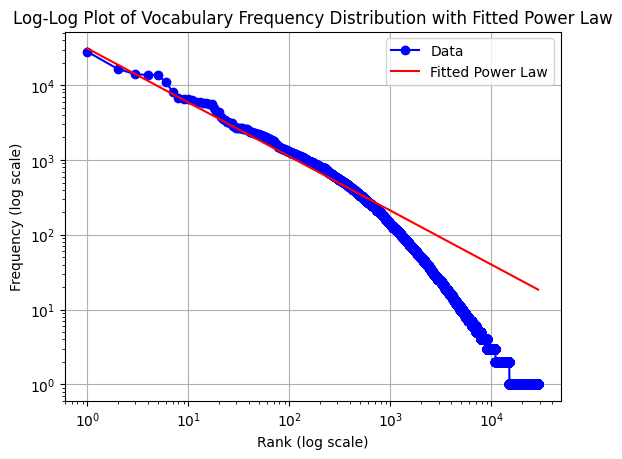

In [ ]:
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, -b)

params, covariance = curve_fit(power_law, ranks, frequencies)

plt.loglog(ranks, frequencies, marker='o', linestyle='-', color='b', label='Data')
plt.loglog(ranks, power_law(ranks, *params), color='r', label='Fitted Power Law')

plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Log-Log Plot of Vocabulary Frequency Distribution with Fitted Power Law')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Extract ranks and frequencies
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = list(sorted_word_counts.values())

# Perform linear regression to find constants a and b
coefficients = np.polyfit(np.log(ranks), np.log(frequencies), 1)
a, b = np.exp(coefficients[1]), coefficients[0]

# Calculate expected frequencies based on Zipf's law
expected_frequencies = [a / (r ** b) for r in ranks]

# Create a DataFrame for the Zipf's law table
zipf_table = pd.DataFrame({
    'Word': list(sorted_word_counts.keys()),
    'Observed Frequency': frequencies,
    'Predicted Frequency (Zipf\'s Law)': expected_frequencies,
    'Rank': ranks
})

In [ ]:
# Print the Zipf's law table
print(zipf_table[:100])


      Word  Observed Frequency  Predicted Frequency (Zipf's Law)  Rank
0     show               28172                      3.224157e+06     1
1    arrow               16553                      9.113008e+06     2
2     left               14047                      1.673491e+07     3
3    right               13710                      2.575771e+07     4
4     imag               13627                      3.598951e+07     5
..     ...                 ...                               ...   ...
95   posit                1326                      3.018919e+09    96
96  intern                1302                      3.066180e+09    97
97    duct                1301                      3.113686e+09    98
98     red                1298                      3.161433e+09    99
99   renal                1279                      3.209423e+09   100

[100 rows x 4 columns]


## Calculate embeddings for the captions using word2vec and glove.

In [ ]:
from gensim.models import KeyedVectors

# Load pre-trained Word2Vec model (Google News vectors)
word2vec_model_path = 'path/to/GoogleNews-vectors-negative300.bin'
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True, limit=500000)

# Example: Getting word vector for a specific word
word_vector = word2vec_model['word']

# Example: Finding similar words
similar_words = word2vec_model.most_similar('word', topn=10)
print("Similar words to 'word' using Word2Vec:")
print(similar_words)


### Load the images

In [ ]:
# import glob
# images = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/test/radiology/images_all'
# # Create a list of all image names in the directory
# img = glob.glob(images + '*.jpg')
img = list(test_caption_df['name'])

train_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/test/radiology/test_caption_df.txt'
train_images = open(train_path, 'r', encoding = 'utf-8').read().split("\n")
train_img = [] # list of all images in training set

for im in img:
	if(im[len(img):] in train_images):
		train_img.append(im)

# load descriptions of training set in a dictionary. Name of the image will act as ey
def load_clean_descriptions(des, dataset):
	dataset_des = dict()
	for key, des_list in des.items():
		if key+'.jpg' in dataset:
			if key not in dataset_des:
				dataset_des[key] = list()
			for line in des_list:
				desc = 'startseq ' + line + ' endseq'
				dataset_des[key].append(desc)
	return dataset_des

train_descriptions = load_clean_descriptions(descriptions, train_images)
print(train_descriptions)


{}


-------

In [ ]:
# List all files in the directory
directory_path = '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/radiology/images'
# List all files in the directory
files = os.listdir(directory_path)

# Count the number of files
number_of_files = len(files)

print(f'Number of files in the directory: {number_of_files}')

Number of files in the directory: 2500


In [ ]:
!ls '/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/test/radiology/captions.txt'

captions.txt  images_all	sel_testdata.gsheet  testdata.gsheet
images	      sel_testdata.csv	testdata.csv


### Calculate embeddings for the captions using word2vec and glove.  
### Visualize part of the word embedding space. Explain the results


In [ ]:
import pandas as pd

# Load a CSV file into a DataFrame
df_vocab = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Shared_data/selected_dataset/selected_dataset/train/vocab_output.csv')


In [ ]:
df_vocab.head()

word  count
0   show  28172
1  arrow  16553
2   left  14047
3  right  13710
4   imag  13627

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-10-27 07:52:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-10-27 07:52:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-10-27 07:52:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_vocab['word'][:10].tolist()

['show',
 'arrow',
 'left',
 'right',
 'imag',
 'ct',
 'scan',
 'mass',
 'tomographi',
 'radiograph']

In [ ]:
import numpy as np
from gensim.models import Word2Vec


raw_text = """
I love machine learning. It is awesome!
Deep learning and natural language processing are very cool.
Artificial intelligence is the future.
"""

# preprocessed_tokens = preprocess_text(raw_text)

preprocessed_tokens = df_vocab['word'].tolist()
# preprocessed_tokens = df_vocab['word'][:100].tolist()

print(type(preprocessed_tokens))
print(preprocessed_tokens)


<class 'list'>
['show', 'arrow', 'left', 'right', 'imag', 'ct', 'scan', 'mass', 'tomographi', 'radiograph', 'comput', 'chest', 'arteri', 'view', 'lesion', 'axial', 'demonstr', 'patient', 'xray', 'mri', 'contrast', 'later', 'white', 'enhanc', 'reveal', 'coron', 'anterior', 'abdomin', 'wall', 'bilater', 'larg', 'magnet', 'reson', 'area', 'lung', 'bone', 'lobe', 'posterior', 'sagitt', 'cm', 'abdomen', 'tumor', 'line', 'postop', 'seen', 'measur', 'lower', 'pulmonari', 'small', 'level', 'upper', 'region', 'vein', 'fractur', 'note', 'ultrasound', 'tissu', 'side', 'month', 'multipl', 'normal', 'mm', 'head', 'indic', 'distal', 'ventricl', 'dilat', 'case', 'brain', 'within', 'preoper', 'liver', 'arrowhead', 'thicken', 'black', 'proxim', 'present', 'segment', 'coronari', 'cystic', 'contrastenhanc', 'section', 'signal', 'pelvi', 'appear', 'bodi', 'kidney', 'atrium', 'angiographi', 'muscl', 'cyst', 'involv', 'de', 'fluid', 'superior', 'posit', 'intern', 'duct', 'red', 'renal', 'femor', 'year', 'so

In [ ]:
# Load GloVe embeddings
glove_embeddings = {}
with open("/content/glove.6B.50d.txt", "r") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove_embeddings[word] = vector

# Train Word2Vec embeddings
model = Word2Vec([preprocessed_tokens], min_count=1, vector_size=50, workers=4)

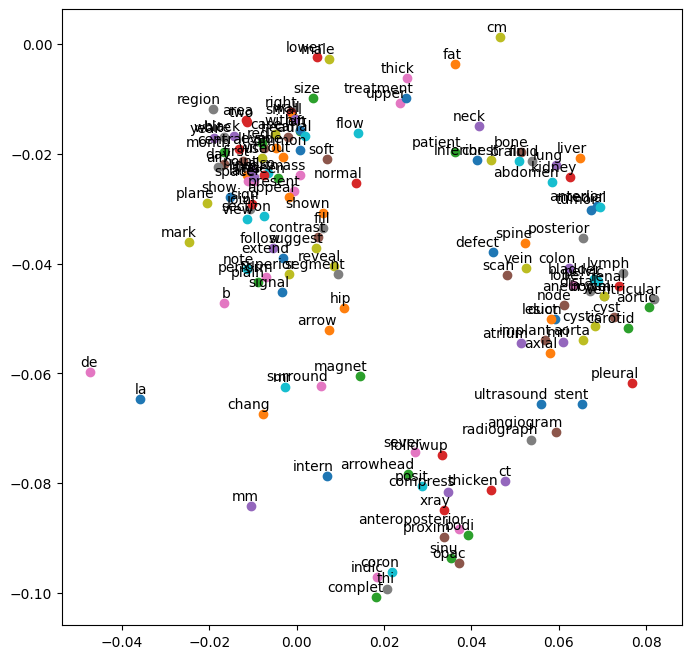

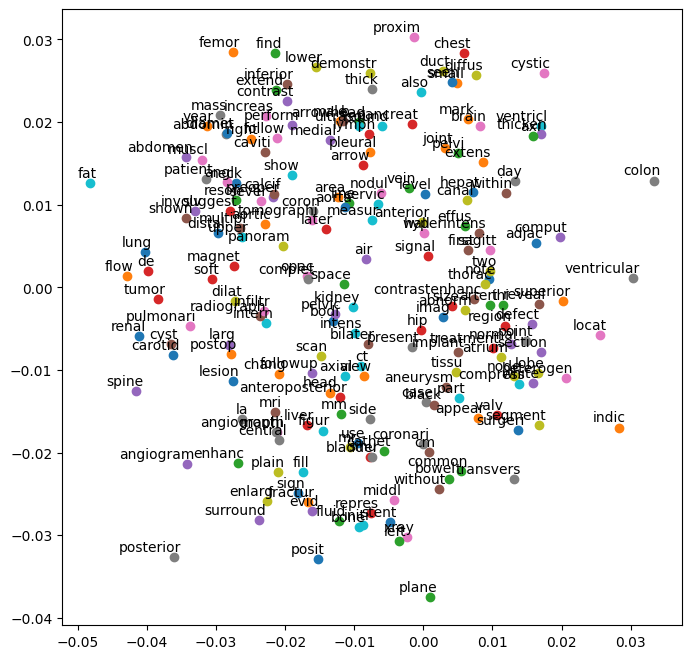

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

# For GloVe
glove_words = [word for word in preprocessed_tokens if word in glove_embeddings]
visualize_embeddings(glove_embeddings, glove_words)

# For Word2Vec gensim model
word2vec_words = model.wv.index_to_key
visualize_embeddings(model.wv, word2vec_words)

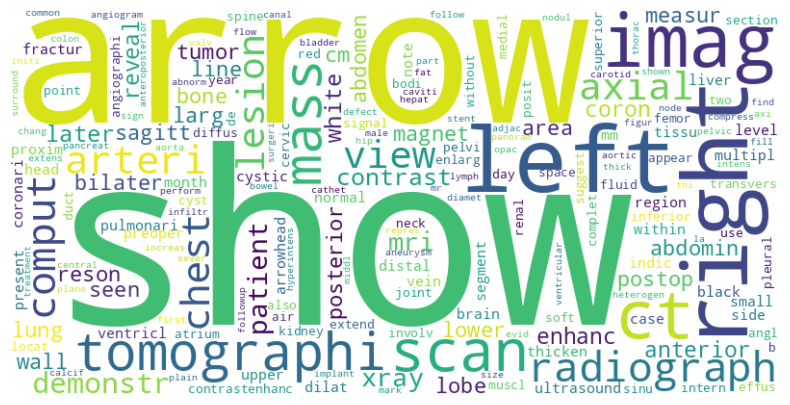

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'word' and 'count' columns
word_cloud_data = dict(zip(df_vocab['word'], df_vocab['count']))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_cloud_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [ ]:
from gensim.models import Word2Vec

# Assuming 'sentences' is a list of tokenized sentences in your text data
#model = Word2Vec(preprocessed_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Train Word2Vec embeddings
model = Word2Vec([preprocessed_tokens], min_count=1, vector_size=50, workers=4)


In [ ]:
# Get word embeddings for specific words
word_list = ['show', 'arrow', 'left', 'right', 'imag', 'ct', 'scan', 'mass', 'tomographi', 'radiograph']  # Replace with your list of words
word_embeddings = [model.wv[word] for word in word_list]


In [ ]:
print(type(word_embeddings))


<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
# Print word embeddings for each word
for word, embedding in zip(word_list, glove_words):
    print(f'Word: {word}, Embedding: {embedding}')

Word: show, Embedding: show
Word: arrow, Embedding: arrow
Word: left, Embedding: left
Word: right, Embedding: right
Word: imag, Embedding: ct
Word: ct, Embedding: scan
Word: scan, Embedding: mass
Word: mass, Embedding: radiograph
Word: tomographi, Embedding: chest
Word: radiograph, Embedding: view


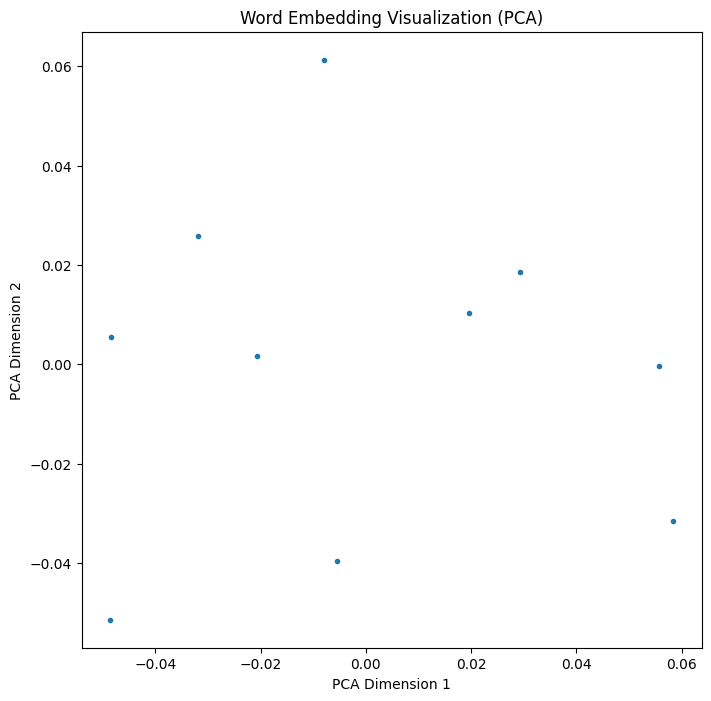

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'embedding_matrix' is your word embedding matrix
# Apply PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(word_embeddings)

# Visualize the 2D embeddings
plt.figure(figsize=(8, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='.')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Word Embedding Visualization (PCA)')
plt.show()


In [ ]:
from sklearn.manifold import TSNE

import numpy as np

# Convert word embeddings to a 2D NumPy array
word_embeddings_array = np.array(word_embeddings)

# Perform t-SNE dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
# tsne = TSNE(n_components=2, random_state=42)
word_embeddings_2d = tsne.fit_transform(word_embeddings_array)

# # Perform t-SNE dimensionality reduction to 2D
# tsne = TSNE(n_components=2, random_state=42)
# word_embeddings_2d = tsne.fit_transform(word_embeddings)

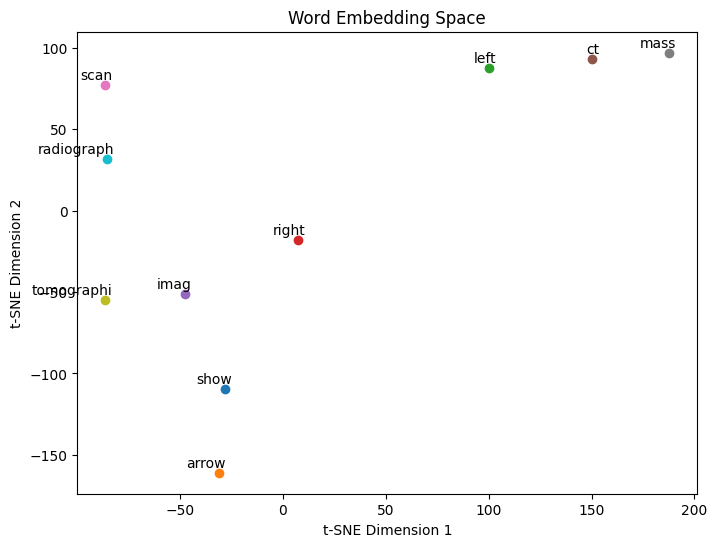

In [ ]:
import matplotlib.pyplot as plt

# Plot the 2D embeddings
plt.figure(figsize=(8, 6))
for i, word in enumerate(word_list):
    x, y = word_embeddings_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embedding Space')
plt.show()